In [1]:
import math
import pickle
import re
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
pd.set_option("display.precision", 3)
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

# This Notebook
Lots of graphs! Mainly exploratory visualization for my sake to get a feel for the distribution of my features (after all data prep and cleaning was complete in eda_prepping notebook) to start to intuit which features may be important in my classification models. 

# Loading in DataFrame:

In [2]:
f = open("df_class_ratios", "rb")
df_class_ratios = pickle.load(f)
f.close()

In [3]:
df_class_ratios

,Class Number,Class Length,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist,Beginner,Intermediate,Advanced,Forearms,Head-Shoulder-Stand,Kneeling,Prone,Side-Lying,Sitting,Standing,Supine,Toes,Crown Chakra (Sahasrara Chakra),Heart Chakra (Anahata Chakra),Root Chakra (Muladhara Chakra),Sacral Chakra (Swadisthana Chakra),Solar Plexus (Manipura Chakra),Third Eye Chakra (Ajna Chakra),Throat Chakra (Vishuddha Chakra),Class Type
0,0,53,0.094,0.245,0.245,0.170,0.000,0.000,0.132,0.057,0.358,0.698,0.189,0.660,0.151,0.019,0.0,0.0,0.019,0.208,0.0,0.302,0.208,0.094,0.0,0.132,0.038,0.057,0.170,0.170,0.038,0.057,Vinyasa
1,1,52,0.365,0.308,0.462,0.423,0.000,0.000,0.115,0.000,0.558,0.750,0.077,0.558,0.288,0.077,0.0,0.0,0.019,0.250,0.0,0.135,0.308,0.212,0.0,0.192,0.077,0.000,0.115,0.096,0.038,0.212,Vinyasa
2,2,19,0.053,0.737,0.474,0.263,0.000,0.000,0.000,0.000,0.684,0.789,0.421,0.474,0.316,0.105,0.0,0.0,0.000,0.105,0.0,0.000,0.789,0.000,0.0,0.158,0.000,0.000,0.316,0.211,0.105,0.105,Vinyasa
3,3,18,0.222,0.222,0.611,0.389,0.056,0.056,0.167,0.167,0.333,0.778,0.333,0.778,0.167,0.056,0.0,0.0,0.000,0.111,0.0,0.333,0.333,0.222,0.0,0.500,0.111,0.000,0.056,0.111,0.000,0.167,Vinyasa
4,4,79,0.101,0.165,0.329,0.241,0.000,0.000,0.114,0.051,0.354,0.557,0.114,0.759,0.114,0.000,0.0,0.0,0.013,0.304,0.0,0.127,0.329,0.101,0.0,0.215,0.063,0.000,0.165,0.190,0.063,0.114,Vinyasa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41164,41220,25,0.200,0.080,0.160,0.120,0.040,0.040,0.360,0.000,0.200,0.760,0.240,0.960,0.120,0.000,0.0,0.0,0.000,0.280,0.0,0.480,0.000,0.320,0.0,0.240,0.000,0.000,0.360,0.040,0.120,0.120,Yin
41165,41221,10,0.100,0.000,0.400,0.100,0.100,0.100,0.600,0.000,0.000,0.500,0.000,0.900,0.100,0.000,0.0,0.0,0.000,0.200,0.0,0.300,0.000,0.500,0.0,0.500,0.000,0.000,0.300,0.100,0.000,0.000,Yin
41166,41222,31,0.065,0.065,0.194,0.065,0.000,0.000,0.355,0.032,0.097,0.677,0.194,1.000,0.000,0.000,0.0,0.0,0.000,0.323,0.0,0.323,0.194,0.161,0.0,0.290,0.097,0.065,0.258,0.129,0.032,0.000,Yin
41167,41223,20,0.050,0.050,0.250,0.150,0.050,0.000,0.350,0.100,0.200,0.750,0.250,0.800,0.100,0.000,0.0,0.0,0.050,0.150,0.0,0.250,0.250,0.200,0.0,0.250,0.100,0.000,0.350,0.050,0.000,0.050,Yin


## Visualizing Relative Feature Counts

Now I am interested in looking at how the distribution of pose categories (ratios  vary between the different types of yoga classes. 

I will for this purpose group by the target variable, "Class Type", and find the mean count of each feature in all the classes of each type. 

In [4]:
df_yoga_types = df_class_ratios.groupby(["Class Type"])[["Class Length",
       'Back-Bend', 'Balance', 'Forward-Bend', 'Inversion', 'Meditative',
       'Pranayama', 'Restorative', 'Side-Bend', 'Strength', 'Stretch', 'Twist',
       'Beginner', 'Intermediate', 'Advanced', 'Forearms',
       'Head-Shoulder-Stand', 'Kneeling', 'Prone', 'Side-Lying', 'Sitting',
       'Standing', 'Supine', 'Toes', 'Crown Chakra (Sahasrara Chakra)',
       'Heart Chakra (Anahata Chakra)', 'Root Chakra (Muladhara Chakra)',
       'Sacral Chakra (Swadisthana Chakra)', 'Solar Plexus (Manipura Chakra)',
       'Third Eye Chakra (Ajna Chakra)', 'Throat Chakra (Vishuddha Chakra)']].mean()

In [5]:
df_yoga_types.reset_index(inplace=True)

In [6]:
df_yoga_types

,Class Type,Class Length,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist,Beginner,Intermediate,Advanced,Forearms,Head-Shoulder-Stand,Kneeling,Prone,Side-Lying,Sitting,Standing,Supine,Toes,Crown Chakra (Sahasrara Chakra),Heart Chakra (Anahata Chakra),Root Chakra (Muladhara Chakra),Sacral Chakra (Swadisthana Chakra),Solar Plexus (Manipura Chakra),Third Eye Chakra (Ajna Chakra),Throat Chakra (Vishuddha Chakra)
0,Ashtanga,37.093,0.154,0.255,0.315,0.234,0.009,0.014,0.104,0.088,0.366,0.723,0.161,0.624,0.230,0.051,1.443e-04,3.257e-04,0.008,0.172,0.002,0.225,0.347,0.152,4.490e-05,0.212,0.085,0.004,0.171,0.154,0.057,0.082
1,Gentle,32.876,0.108,0.149,0.234,0.120,0.015,0.018,0.173,0.076,0.236,0.706,0.172,0.811,0.090,0.008,1.077e-05,4.803e-05,0.012,0.163,0.002,0.270,0.266,0.194,2.717e-05,0.149,0.067,0.009,0.222,0.144,0.043,0.068
2,Hatha,35.861,0.121,0.210,0.257,0.168,0.012,0.017,0.139,0.080,0.301,0.699,0.162,0.710,0.154,0.021,3.042e-05,1.428e-04,0.017,0.174,0.003,0.223,0.300,0.166,4.556e-05,0.170,0.066,0.005,0.187,0.141,0.053,0.069
3,Iyengar,29.085,0.112,0.233,0.252,0.212,0.012,0.013,0.146,0.101,0.318,0.723,0.156,0.710,0.177,0.040,0.000e+00,5.129e-04,0.009,0.146,0.001,0.213,0.349,0.208,4.102e-05,0.227,0.084,0.009,0.213,0.119,0.055,0.072
4,Power,47.038,0.143,0.284,0.303,0.232,0.005,0.006,0.084,0.087,0.447,0.706,0.151,0.596,0.246,0.041,5.865e-05,4.353e-04,0.011,0.230,0.003,0.161,0.347,0.130,1.351e-05,0.167,0.071,0.004,0.173,0.179,0.063,0.087
5,Restorative,24.379,0.104,0.076,0.211,0.092,0.018,0.024,0.320,0.058,0.137,0.662,0.181,0.826,0.075,0.007,2.065e-05,1.194e-04,0.009,0.169,0.007,0.276,0.127,0.321,0.000e+00,0.192,0.045,0.011,0.184,0.108,0.037,0.057
6,Vinyasa,43.536,0.136,0.249,0.299,0.212,0.009,0.011,0.111,0.084,0.367,0.707,0.156,0.655,0.195,0.028,3.294e-05,1.377e-04,0.016,0.200,0.002,0.188,0.342,0.128,4.534e-05,0.167,0.071,0.004,0.185,0.153,0.064,0.076
7,Yin,21.887,0.105,0.058,0.241,0.092,0.017,0.020,0.292,0.066,0.103,0.681,0.202,0.773,0.124,0.010,5.129e-06,5.441e-05,0.009,0.205,0.006,0.303,0.071,0.314,4.036e-05,0.194,0.029,0.004,0.245,0.140,0.029,0.057


Lovely! So above is a complete DataFrame with mean ratios of pose types across all the classes in each yoga genre. 

The categorical features that each of the columns fall into are: 

* "Movement Type", which includes columns Back-Bend, Balance, Forward-Bend, Inversion, Meditative, Pranayama, Restorative, Side-Bend, Strengh, Stretch, and Twist; 

* "Difficulty", which includes columns Beginner, Intermediate, and Advanced; 

* "Position", which includes columns Forearms, Head-Shoulder-Stand, Kneeling, Prone, Side-Lying, Sitting, Standing, Supine, and Toes; 

* and "Chakra", which includes columns Root Chakra, Sacral Chakra, Solar Plexus Chakra, Heart Chakra, Throat Chakra, Third Eye Chakra, and Crown Chakra. 

I will visualize the distributions of mean percentages of poses in each of these categories in each genre fall into. 

### Movement Type

In [7]:
df_movement_type = df_yoga_types.iloc[:, 2:13]

In [8]:
df_movement_type["Class Type"] = df_yoga_types["Class Type"]

In [9]:
df_movement_type = df_movement_type[['Class Type', 'Back-Bend', 'Balance', 'Forward-Bend', 'Inversion', 'Meditative',
       'Pranayama', 'Restorative', 'Side-Bend', 'Strength', 'Stretch', 'Twist']]

In [10]:
df_movement_type

,Class Type,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist
0,Ashtanga,0.154,0.255,0.315,0.234,0.009,0.014,0.104,0.088,0.366,0.723,0.161
1,Gentle,0.108,0.149,0.234,0.120,0.015,0.018,0.173,0.076,0.236,0.706,0.172
2,Hatha,0.121,0.210,0.257,0.168,0.012,0.017,0.139,0.080,0.301,0.699,0.162
3,Iyengar,0.112,0.233,0.252,0.212,0.012,0.013,0.146,0.101,0.318,0.723,0.156
4,Power,0.143,0.284,0.303,0.232,0.005,0.006,0.084,0.087,0.447,0.706,0.151
5,Restorative,0.104,0.076,0.211,0.092,0.018,0.024,0.320,0.058,0.137,0.662,0.181
6,Vinyasa,0.136,0.249,0.299,0.212,0.009,0.011,0.111,0.084,0.367,0.707,0.156
7,Yin,0.105,0.058,0.241,0.092,0.017,0.020,0.292,0.066,0.103,0.681,0.202


In [11]:
df_movement_type_melt = pd.melt(df_movement_type, id_vars="Class Type", var_name="Movement Type", value_name="Ratio")

In [12]:
df_movement_type_melt.head(10)

,Class Type,Movement Type,Ratio
0,Ashtanga,Back-Bend,0.154
1,Gentle,Back-Bend,0.108
2,Hatha,Back-Bend,0.121
3,Iyengar,Back-Bend,0.112
4,Power,Back-Bend,0.143
5,Restorative,Back-Bend,0.104
6,Vinyasa,Back-Bend,0.136
7,Yin,Back-Bend,0.105
8,Ashtanga,Balance,0.255
9,Gentle,Balance,0.149


/Users/anterra/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 576x432 with 0 Axes>

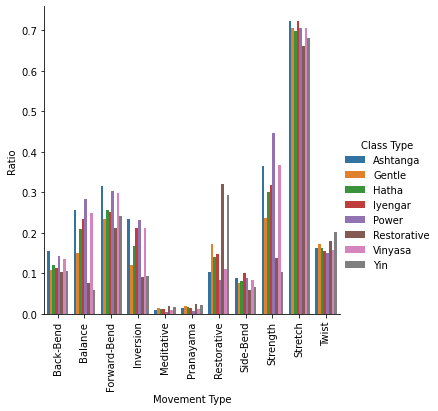

In [13]:
plt.figure(figsize=(8, 6));
sns.factorplot(x="Movement Type", y="Ratio", hue="Class Type", data=df_movement_type_melt, kind="bar");
plt.xticks(rotation=90);

In [14]:
def plot_movement_types(row, class_type):
    plt.figure(figsize=(6, 4))
    sns.barplot(x = df_yoga_types.columns[2:13], y = df_yoga_types.iloc[row, 2:13])
    plt.title("Movement Types in " + class_type)
    plt.xticks(rotation=90);

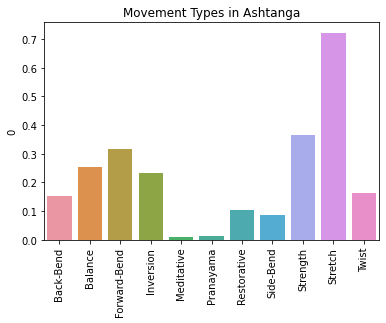

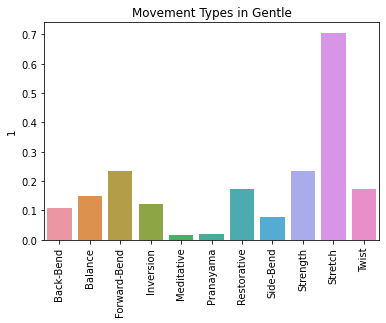

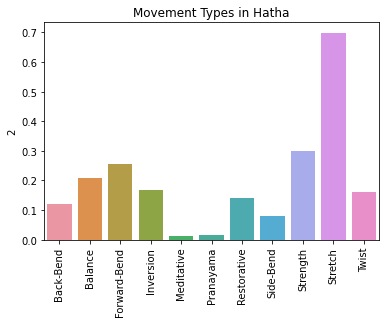

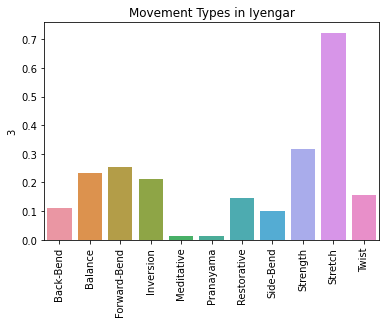

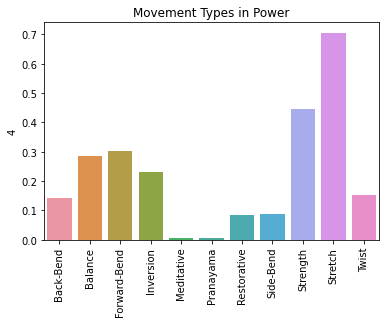

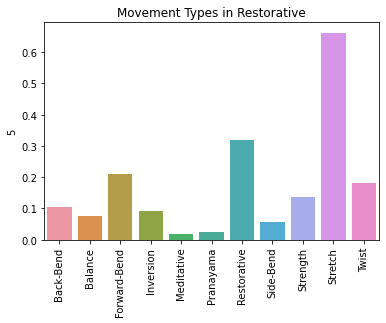

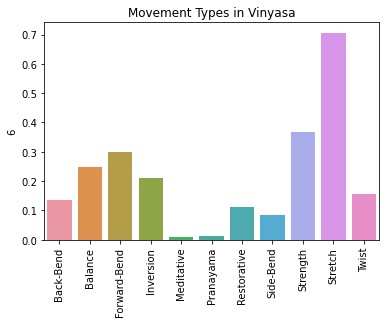

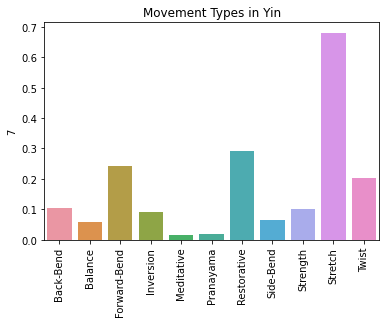

In [15]:
for index in df_yoga_types["Class Type"].index:
    plot_movement_types(index, df_yoga_types.iloc[index, 0])

### Difficulty

In [16]:
def plot_difficulty(row, class_type):
    plt.figure(figsize=(6, 4))
    sns.barplot(x = df_yoga_types.columns[13:16], y = df_yoga_types.iloc[row, 13:16])
    plt.title("Difficulty of Poses " + class_type);

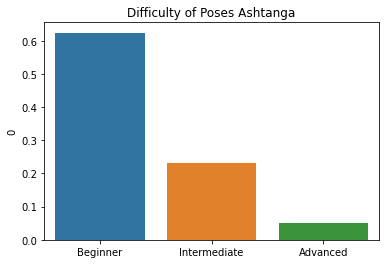

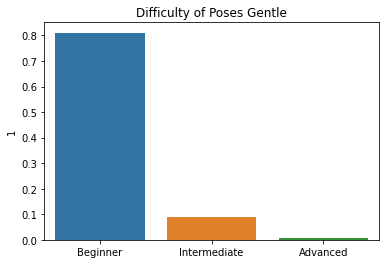

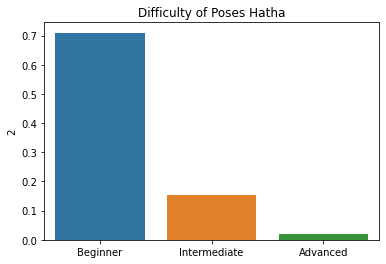

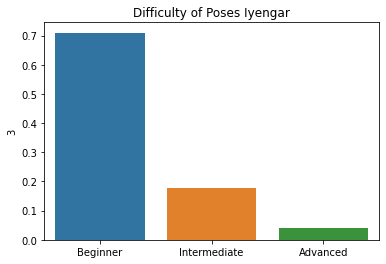

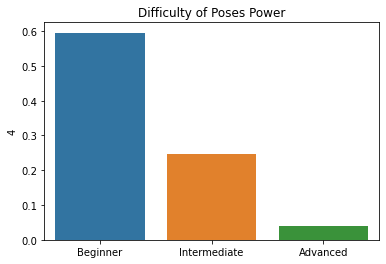

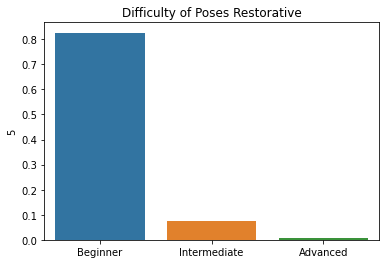

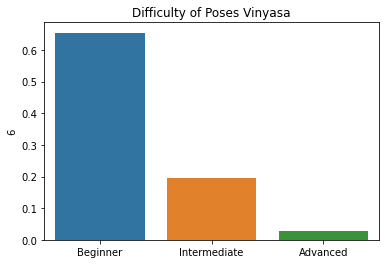

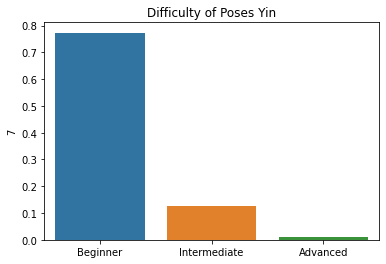

In [17]:
for index in df_yoga_types["Class Type"].index:
    plot_difficulty(index, df_yoga_types.iloc[index, 0])

### Position

In [18]:
def plot_positions(row, class_type):
    plt.figure(figsize=(6, 4))
    sns.barplot(x = df_yoga_types.columns[16:25], y = df_yoga_types.iloc[row, 16:25])
    plt.title("Position of Poses in " + class_type)
    plt.xticks(rotation=90);

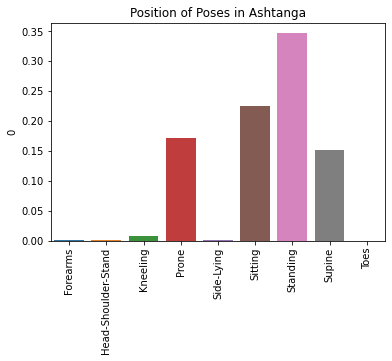

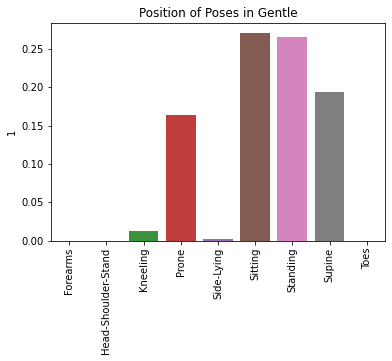

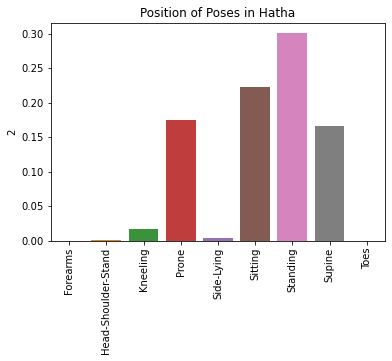

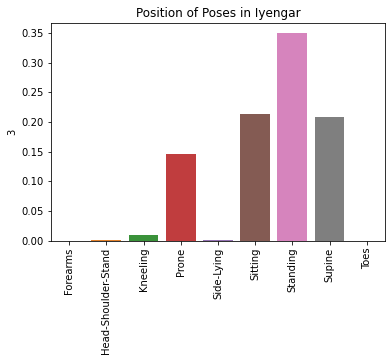

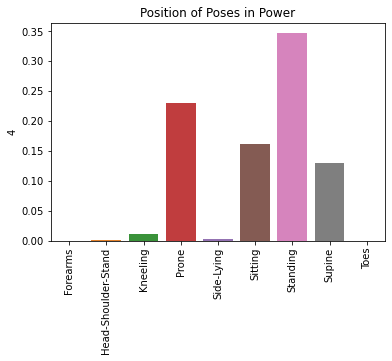

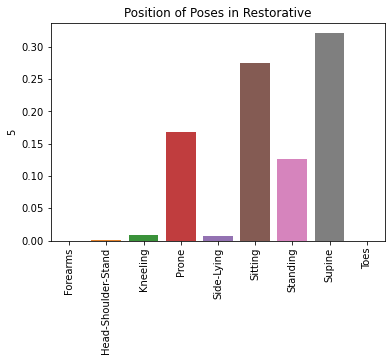

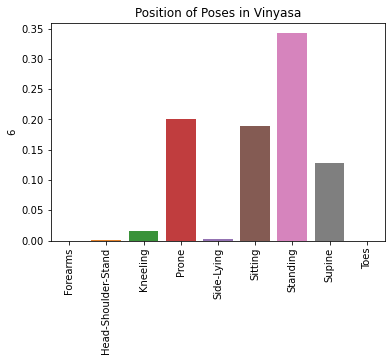

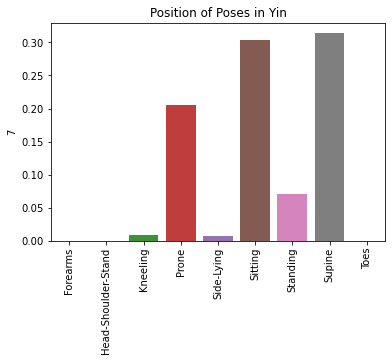

In [19]:
for index in df_yoga_types["Class Type"].index:
    plot_positions(index, df_yoga_types.iloc[index, 0])

### Chakras

In [20]:
def plot_chakras(row, class_type):
    plt.figure(figsize=(6, 4))
    sns.barplot(x = df_yoga_types.columns[25:], y = df_yoga_types.iloc[row, 25:])
    plt.title("Chakras Activated in " + class_type)
    plt.xticks(rotation=90);

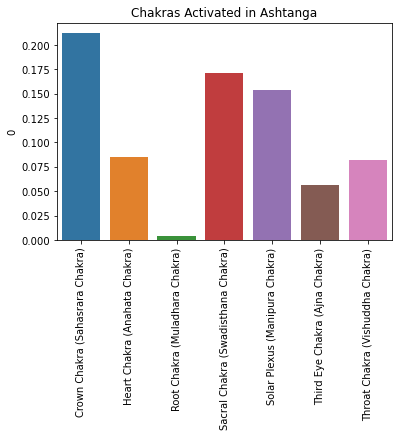

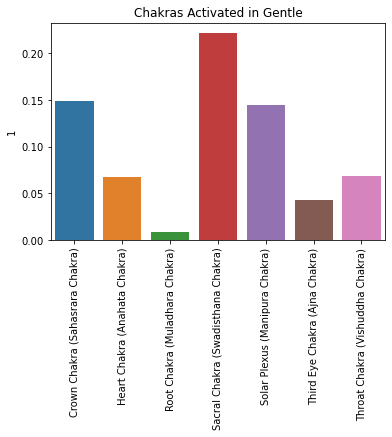

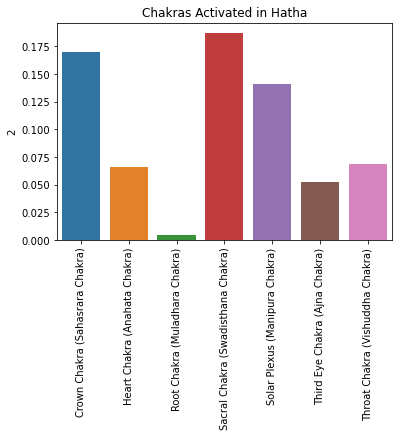

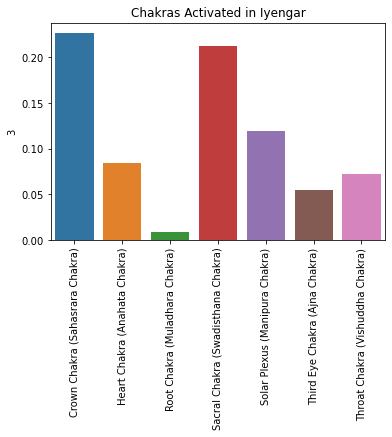

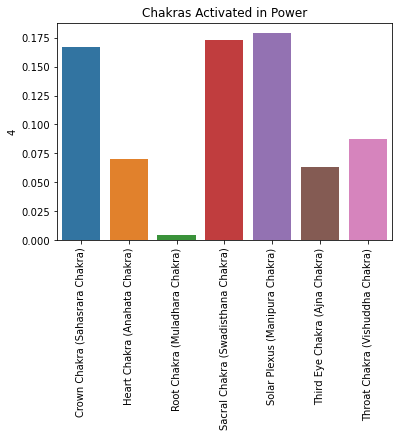

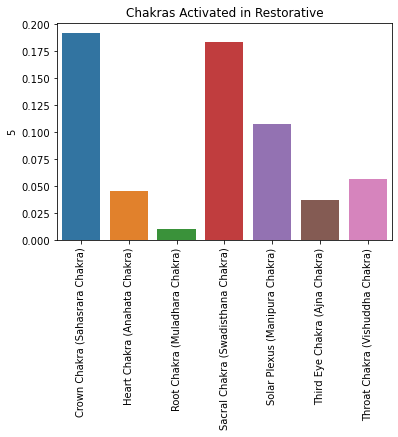

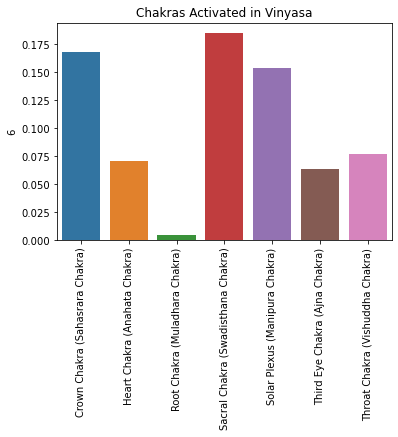

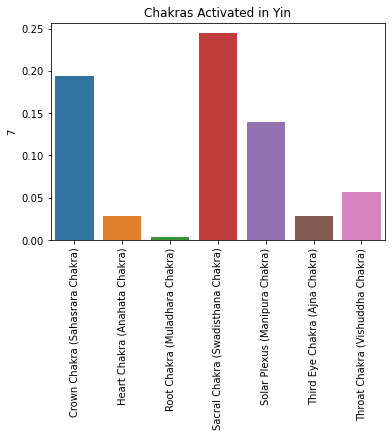

In [21]:
for index in df_yoga_types["Class Type"].index:
    plot_chakras(index, df_yoga_types.iloc[index, 0])

### Features vs. Class Type

In [22]:
def plot_feature(feature): 
    plt.figure(figsize=(6, 4))
    sns.barplot(x = "Class Type", y = feature, data=df_yoga_types)
    plt.title(feature + " Poses by Class Type");

/Users/anterra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


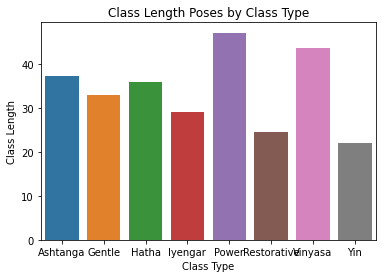

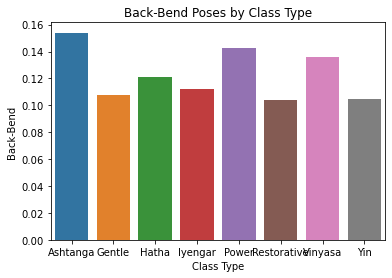

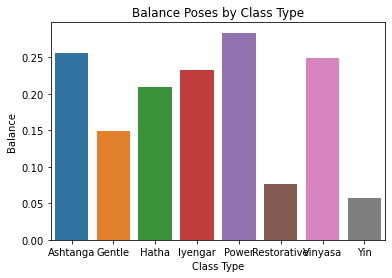

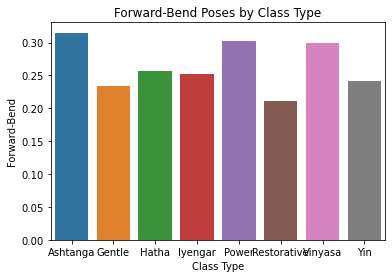

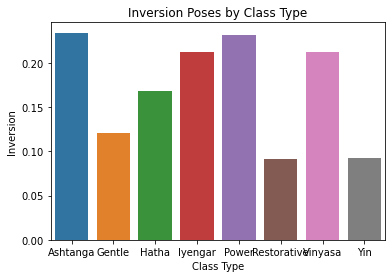

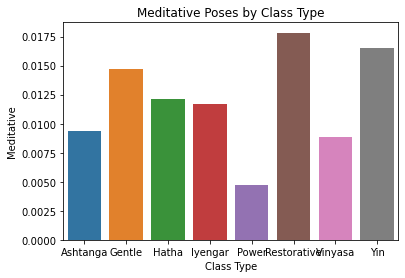

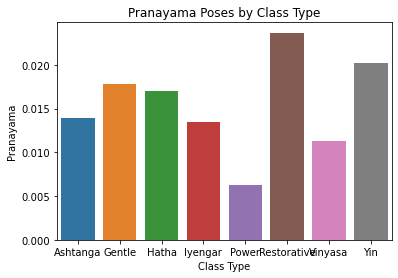

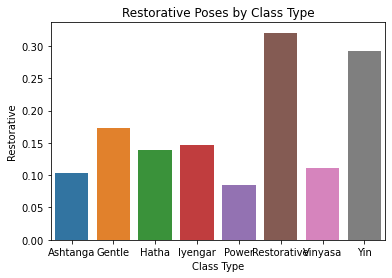

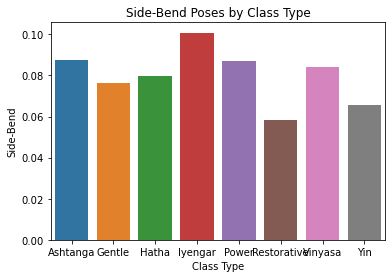

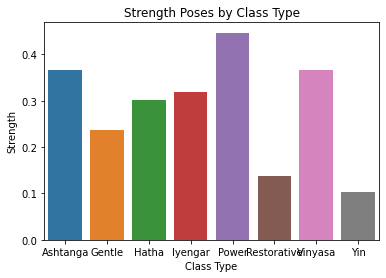

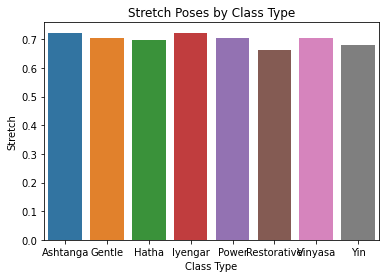

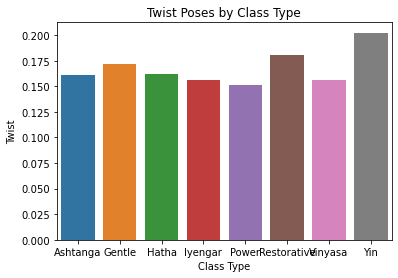

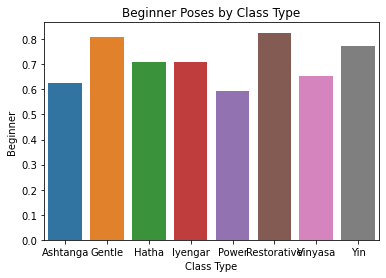

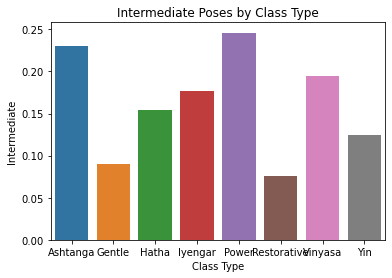

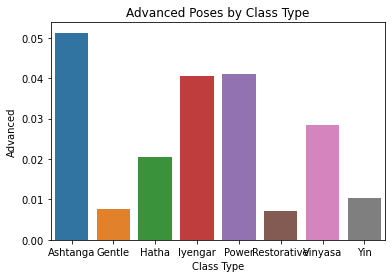

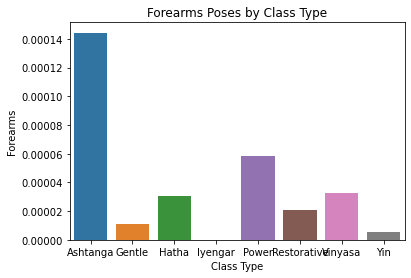

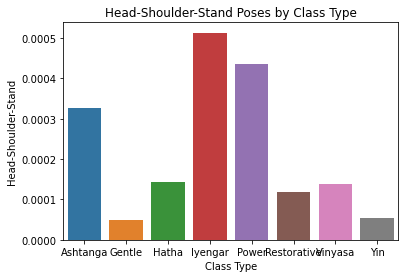

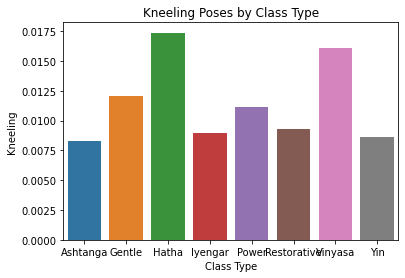

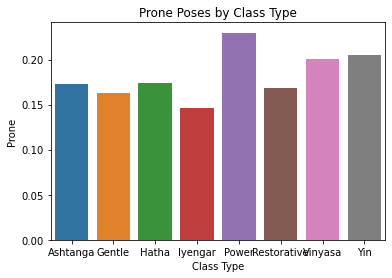

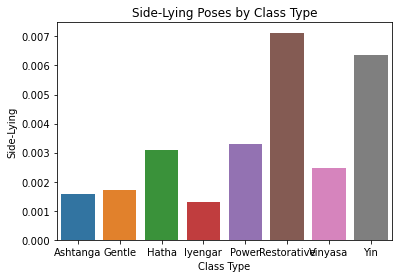

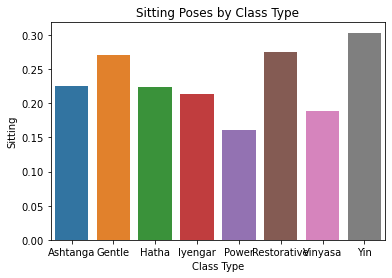

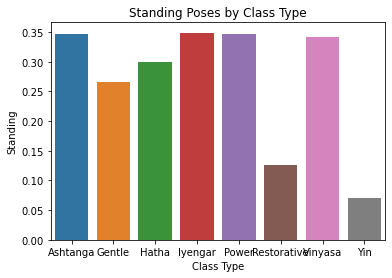

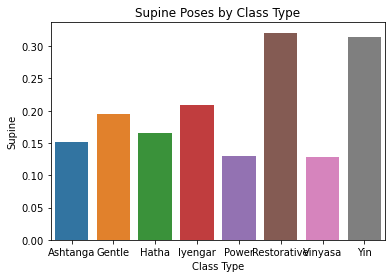

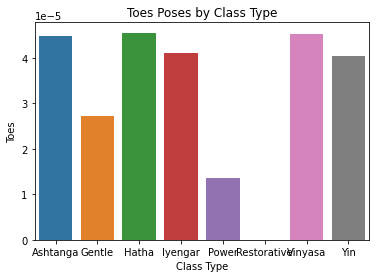

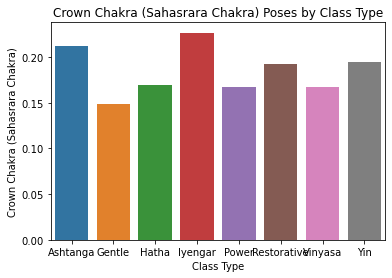

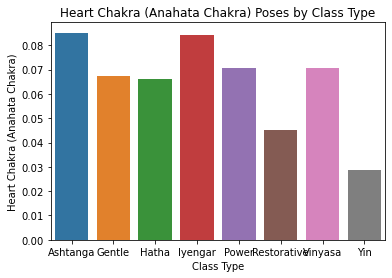

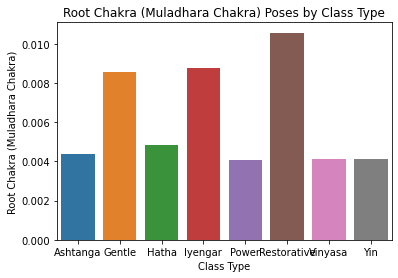

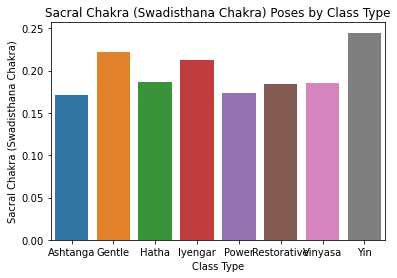

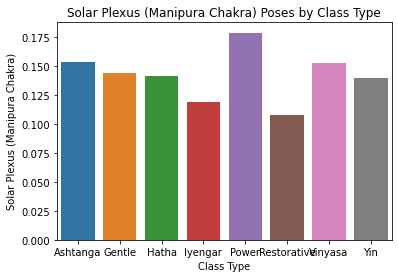

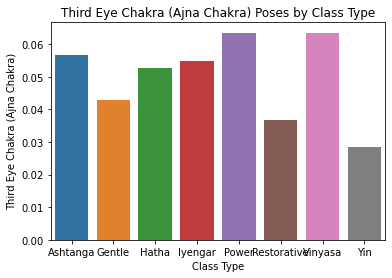

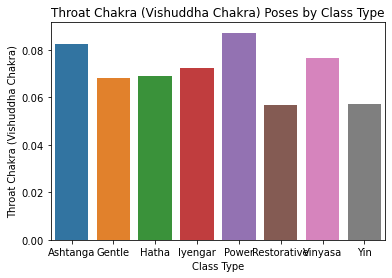

In [23]:
for column in df_yoga_types.columns[1:]:
    plot_feature(column)

# Qualitative Feature Importances

From the above plots, keeping in mind the ratio (out of 1) scales on the y-axes, it looks to me like feature categories that will have a strong influence on classification are what ratio of a class's poses are be classified as:
* Length
* Balance
* Inversion
* Restorative
* Strength
* Advanced
* Standing
* Supine